<a href="https://colab.research.google.com/github/R-driste/3.3.1_for_5.13.23/blob/main/Group_Copy_of_NINTENDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setup File and Initial Df**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

nintendo_df = pd.read_csv('data.csv') #downloaded from https://www.kaggle.com/datasets/mrmorj/nintendo-games-dataset

headers =  ["Meta Score","Title","Platform","Date","User Score","Link","Esrb Rating","Developers","Genres"]
nintendo_df.columns = headers
nintendo_df = nintendo_df.dropna()

nintendo_df

,Meta Score,Title,Platform,Date,User Score,Link,Esrb Rating,Developers,Genres
2,66.0,Fitness Boxing 2: Rhythm & Exercise,Switch,"Dec 4, 2020",6.2,/game/switch/fitness-boxing-2-rhythm-exercise,E,"['Nintendo', ' Imagineer Co.', 'Ltd.']","['Miscellaneous', 'Exercise / Fitness']"
3,63.0,Fire Emblem: Shadow Dragon & the Blade of Light,Switch,"Dec 4, 2020",7.6,/game/switch/fire-emblem-shadow-dragon-the-bla...,E,['Intelligent Systems'],"['Strategy', 'Turn-Based', 'Tactics']"
4,79.0,Hyrule Warriors: Age of Calamity,Switch,"Nov 20, 2020",8.1,/game/switch/hyrule-warriors-age-of-calamity,T,"['Omega Force', ' Koei Tecmo Games']","['Action', ""Beat-'Em-Up"", '3D']"
7,85.0,Pikmin 3 Deluxe,Switch,"Oct 30, 2020",8.4,/game/switch/pikmin-3-deluxe,E10+,"['Eighting', ' Nintendo']","['Strategy', 'Real-Time', 'General']"
8,79.0,Part Time UFO,Switch,"Oct 28, 2020",7.3,/game/switch/part-time-ufo,E10+,['HAL Labs'],"['Action', 'Arcade']"
...,...,...,...,...,...,...,...,...,...
998,90.0,Blast Corps,N64,"Feb 28, 1997",8.4,/game/nintendo-64/blast-corps,E,['Rare Ltd.'],"['Action', 'General']"
999,83.0,Mario Kart 64,N64,"Feb 10, 1997",8.6,/game/nintendo-64/mario-kart-64,E,['Nintendo'],"['Driving', 'Racing', 'Kart']"
1000,92.0,Wave Race 64,N64,"Nov 1, 1996",8.3,/game/nintendo-64/wave-race-64,E,['Nintendo'],"['Driving', 'Racing', 'Snow / Water']"
1001,80.0,Pilotwings 64,N64,"Sep 29, 1996",8.0,/game/nintendo-64/pilotwings-64,E,['Paradigm Entertainment'],"['Simulation', 'General']"


In [ ]:
ignore_strings = ['[',"]" ,","]
def string_to_list(string):
    wordgoing = True
    word_list = []
    word = ''
    for i in range(len(string)):
        if (i == (len(string) - 1)):
            pass
        elif string[i] == "'":
          wordgoing = not wordgoing
          if wordgoing == True:
            word_list.append(word.strip())
            word = ""
        elif (string[i] in ignore_strings):
            pass
        else:
            word += string[i]
    return word_list

string_to_list("['Action', 'Platformer', '3D']")

['Action', 'Platformer', '3D']

# **Adjust to expand the Genres**

In [ ]:
def expand_lists(column_name, df):
  for row in df.values:
      cat_items = string_to_list(row[-1])
      for item in cat_items:
        new_row = row[:-1].tolist()
        new_row.append(item)
        new_data = pd.DataFrame([new_row], columns=headers)
        df = df.append(new_data)
  
  return df


In [ ]:
new_df = pd.DataFrame()
for row in nintendo_df.values:
    row_genres = string_to_list(row[-1])
    for genre in row_genres:
      new_row = row[:-1].tolist()
      new_row.append(genre)
      new_data = pd.DataFrame([new_row], columns=headers)
      new_df = new_df.append(new_data)

new_df_2 = pd.DataFrame()
for row in nintendo_df.values:
    row_devs = string_to_list(row[-2])
    print(row_devs)
    for dev in row_devs:
      new_row = row.tolist()
      del new_row[-2]
      new_row.insert(-1,dev)
      new_data = pd.DataFrame([new_row], columns=headers)
      new_df_2 = new_df_2.append(new_data)

new_df_2

In [ ]:
print(new_df['Genres'].unique())
print(new_df_2['Developers'].unique())
print(nintendo_df['Esrb Rating'].unique())

['Miscellaneous' 'Exercise / Fitness' 'Strategy' 'Turn-Based' 'Tactics'
 'Action' '"Beat-Em-Up"' 'Real-Time' 'General' 'Arcade' 'Racing'
 'Automobile' 'Compilation' 'Role-Playing' 'Puzzle' 'Matching' 'Trainer'
 'Party / Minigame' 'Action RPG' 'Simulation' 'Virtual' 'Virtual Life'
 'Roguelike' 'Japanese-Style' 'Action Adventure' 'Open-World' 'Vehicle'
 'Combat' 'Platformer' '2D' 'Rhythm' 'Music' '3D' 'Stacking' 'Fighting'
 'Sports' 'Individual' 'Tennis' 'Shooter' 'Third-Person' 'Adventure'
 'Linear' 'Sandbox' 'Career' '"Shoot-Em-Up"' 'Boxing / Martial Arts'
 'Other' 'Fantasy' 'Logic' 'First-Person' 'Athletics' 'Edutainment'
 'Application' 'Board / Card Game' 'Modern' 'Rail' 'Space' 'Sci-Fi'
 'Defense' 'Horror' 'Survival' 'Driving' 'Kart' 'Party'
 'Console-style RPG' 'Traditional' 'Golf' 'Submarine' 'Marine'
 'Olympic Sports' '"Beat-Em-Up" "Beat-' 'Em-Up" 2D' 'Board Games'
 'Scrolling' 'Soccer' 'Hidden Object' 'Pet' 'Flight' 'Civilian Plane'
 'Civilian' 'Em-Up" 3D' 'Visual Novel' 'Motorc

Now we can form our prediction of which Genre ✈

# **Graph Time!**

Graphs and statistics Required!

Group 1: Developers.
GRAPH
Categories of Developer vs User_score and Meta_score

Group 2: Genres.
GRAPH
Categories of Genre vs User_score and Meta_score

Group 3: Esrb Rating
Calculate Mode Rating
Calculate Average Rating per Score

Stay tuned!

TypeError: ignored

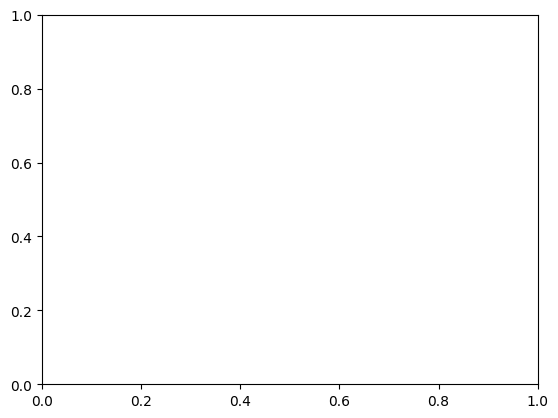

In [ ]:
#plt.scatter(nintendo_df['user_score'],nintendo_df['meta_score'])
plt.bar(nintendo_df['genres'],nintendo_df['user_score'])